# Importing The Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Exploring The Data

In [2]:
rawCsvTrain = pd.read_csv("D:\\Data sets\\Sustainability\\train.csv")
rawCsvTest = pd.read_csv("D:\\Data sets\\Sustainability\\test.csv")

In [19]:
rawCsvSample = pd.read_csv("D:\\Data sets\\Sustainability\\sample_submission.csv")

In [3]:
completeDf = rawCsvTrain.copy()
testDf = rawCsvTest.copy()

In [4]:
completeDf.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [5]:
testDf.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [6]:
completeDf.shape, testDf.shape

((175296, 18), (17520, 18))

# Handling The Missing Values

<AxesSubplot:>

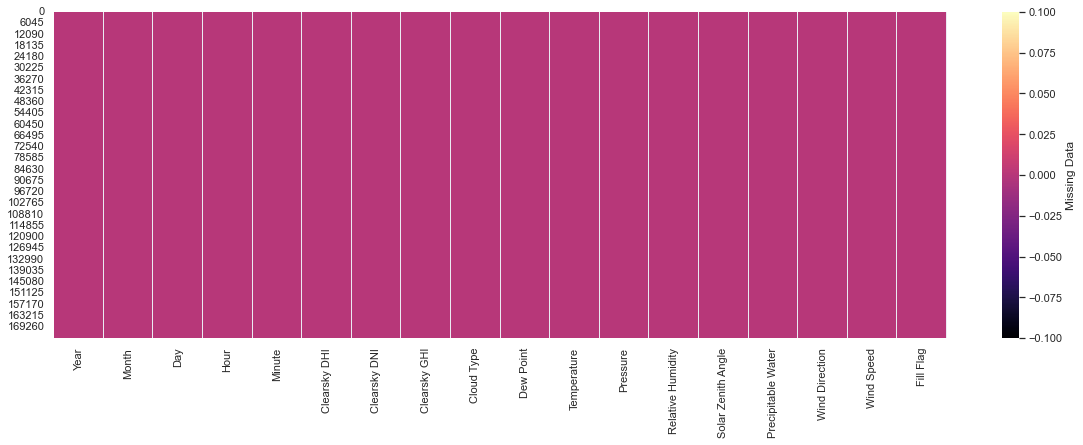

In [7]:
plt.figure(figsize=(20,6))
sns.heatmap(completeDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

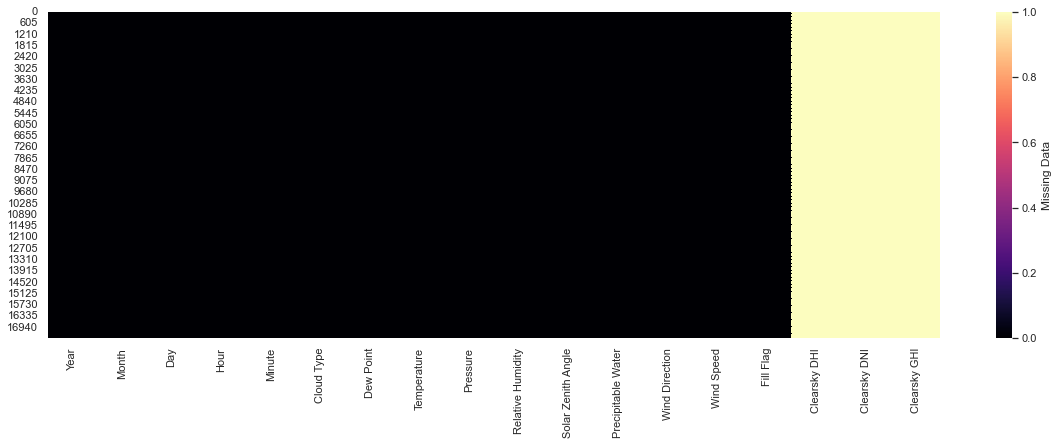

In [8]:
plt.figure(figsize=(20,6))
sns.heatmap(testDf.isna(),
            cmap="magma",
            cbar_kws={'label': 'Missing Data'})

In [9]:
completeDf.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [10]:
testDf.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [20]:
rawCsvSample.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [22]:
rawCsvSample.shape

(17520, 3)

# The Date

In [11]:
completeDf.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [12]:
completeDf['dateStr']=  completeDf['Day'].astype(str).str.zfill(2) + completeDf['Month'].astype(str).str.zfill(2)+ completeDf['Year'].astype(str) + completeDf['Hour'].astype(str).str.zfill(2) \
                         + completeDf['Minute'].astype(str).str.zfill(2)
completeDf['Date'] = pd.to_datetime(completeDf['dateStr'], format='%d%m%Y%H%M')

In [13]:
completeDf.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,dateStr,Date
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,010120090000,2009-01-01 00:00:00
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,010120090030,2009-01-01 00:30:00
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,010120090100,2009-01-01 01:00:00
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,010120090130,2009-01-01 01:30:00
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,010120090200,2009-01-01 02:00:00


In [14]:
del completeDf['Year'],completeDf['Month'], completeDf['Day'], completeDf['Hour'], completeDf['Minute'], completeDf['dateStr']

In [15]:
completeDf.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Date
0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0,2009-01-01 00:00:00
1,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0,2009-01-01 00:30:00
2,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0,2009-01-01 01:00:00
3,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0,2009-01-01 01:30:00
4,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0,2009-01-01 02:00:00


# Explore The Data

In [16]:
completeDf.describe()

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


In [28]:
corr = completeDf.corr()
corr.style.background_gradient(cmap='Spectral').set_precision(2)

,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Clearsky DHI,1,0.86,0.91,0.022,0.22,0.5,-0.094,-0.56,-0.87,0.21,-0.00019,0.32,0.00074
Clearsky DNI,0.86,1,0.93,-0.073,0.034,0.38,0.007,-0.68,-0.89,-0.0022,0.0063,0.38,0.0063
Clearsky GHI,0.91,0.93,1,-0.047,0.14,0.48,-0.051,-0.66,-0.89,0.11,0.0049,0.35,-0.03
Cloud Type,0.022,-0.073,-0.047,1,0.2,0.067,-0.14,0.24,0.027,0.33,-0.082,0.073,0.09
Dew Point,0.22,0.034,0.14,0.2,1,0.85,-0.42,0.19,-0.22,0.88,-0.076,-0.14,0.037
Temperature,0.5,0.38,0.48,0.067,0.85,1,-0.37,-0.34,-0.53,0.74,-0.067,-0.047,0.016
Pressure,-0.094,0.007,-0.051,-0.14,-0.42,-0.37,1,-0.085,0.079,-0.37,-0.18,-0.12,0.053
Relative Humidity,-0.56,-0.68,-0.66,0.24,0.19,-0.34,-0.085,1,0.61,0.18,-0.019,-0.17,0.024
Solar Zenith Angle,-0.87,-0.89,-0.89,0.027,-0.22,-0.53,0.079,0.61,1,-0.18,0.0038,-0.3,-0.029
Precipitable Water,0.21,-0.0022,0.11,0.33,0.88,0.74,-0.37,0.18,-0.18,1,-0.11,-0.11,0.044


In [29]:
"""
From the Covariance Matrix its clear the Clearsky DHI, DNI and GHI are codependent a bit so finding one would be quite helpful, GHI -> DNI -> DHI, in that order preferably. 
Also Solar Zenith Angle & Relative Humidity looks to have some relationship. 
"""

'\nFrom the Covariance Matrix its clear the Clearsky DHI, DNI and GHI are codependent a bit so finding one would be quite helpful, GHI -> DNI -> DHI, in that order preferably. \nAlso Solar Zenith Angle & Relative Humidity looks to have some relationship. \n'

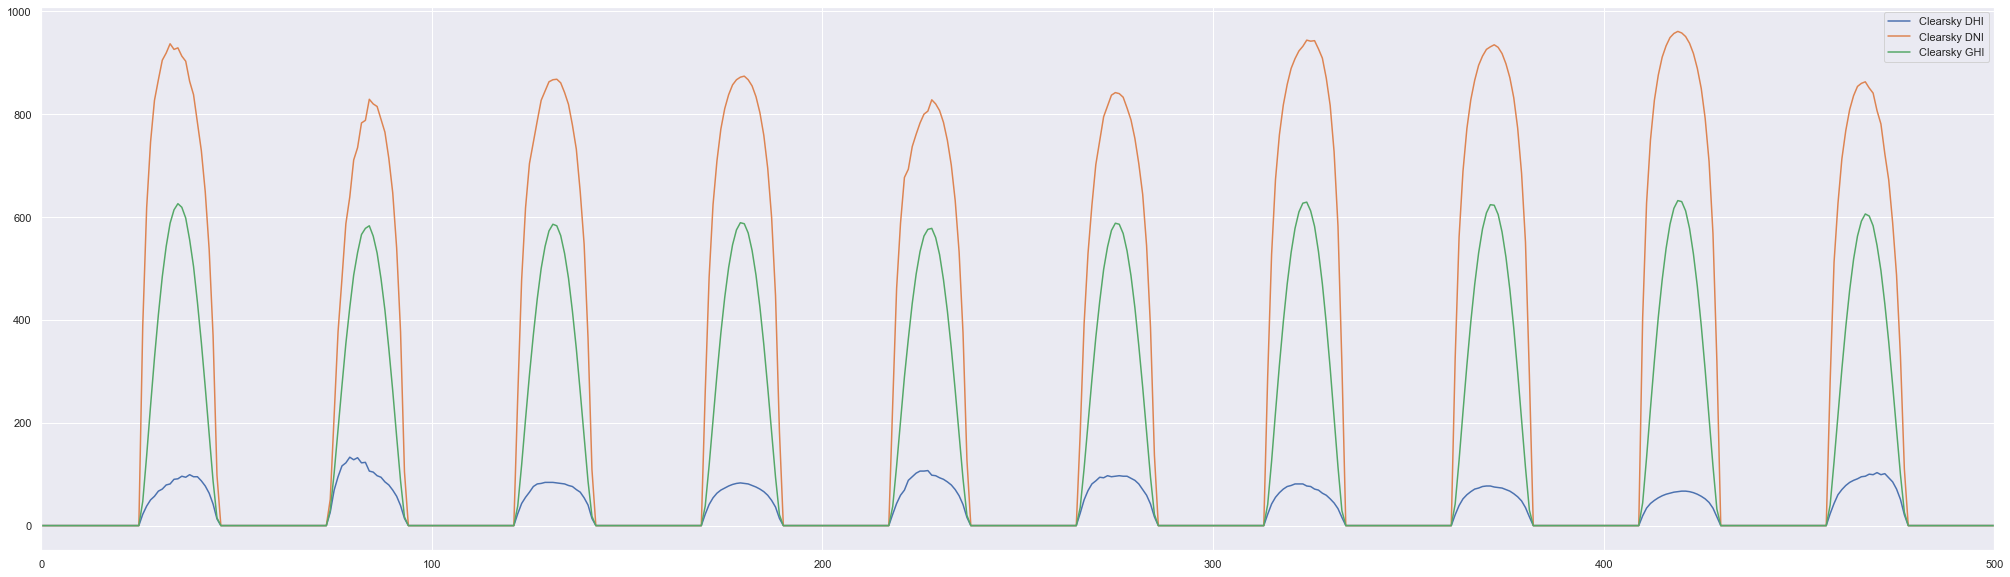

In [17]:
plt.figure(figsize=(35,10))
completeDf['Clearsky DHI'][:501].plot()
completeDf['Clearsky DNI'][:501].plot()
completeDf['Clearsky GHI'][:501].plot()
plt.legend()

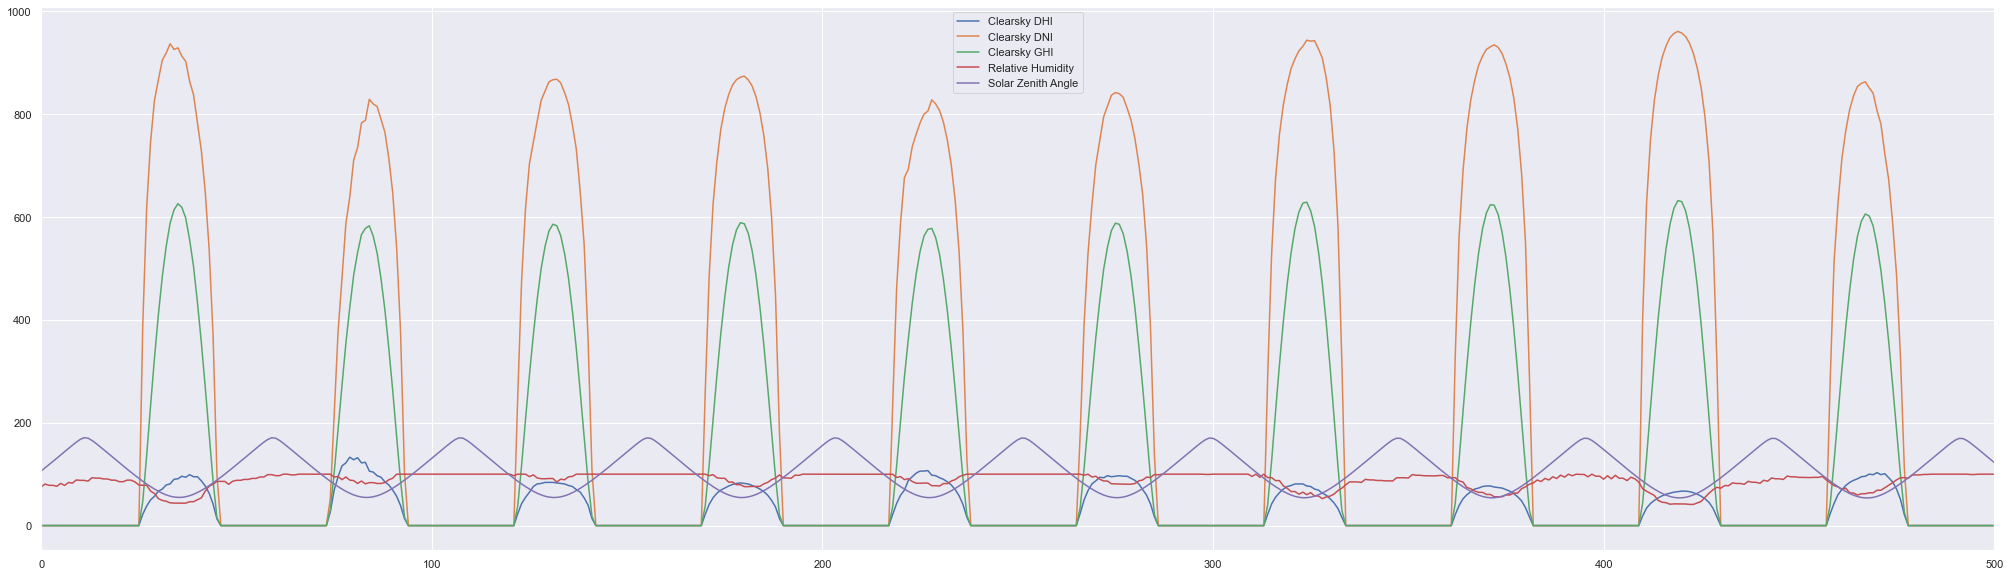

In [30]:
plt.figure(figsize=(35,10))
completeDf['Clearsky DHI'][:501].plot()
completeDf['Clearsky DNI'][:501].plot()
completeDf['Clearsky GHI'][:501].plot()
completeDf['Relative Humidity'][:501].plot()
completeDf['Solar Zenith Angle'][:501].plot()
plt.legend()